In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import seaborn as sns

In [2]:
data_df = pd.read_csv(f'Simulations/SIR_simulation_novax_0.07.csv')
data_df.head(3)

,time,I,nv,c1,c2,ar,V_tot,kind,net_type
0,0,5.00,100,0.000,0.000,361,634.000,mean,static
1,0,0.00,100,0.000,0.000,64,62.844,std,static
2,1,10.31,100,135.875,135.875,361,634.000,mean,static


In [3]:
mask1 = (data_df.net_type == 'static') & (data_df.kind == 'mean')
mask2 = (data_df.net_type == 'static') & (data_df.kind == 'std')
mask3 = (data_df.net_type == 'dynamic') & (data_df.kind == 'mean')
mask4 = (data_df.net_type == 'dynamic') & (data_df.kind == 'std')

static_mean = data_df[mask1].filter(items=['time', 'I', 'nv', 'c1', 'c2', 'ar', 'V_tot'])
static_std = data_df[mask2].filter(items=['time', 'I', 'nv', 'c1', 'c2', 'ar', 'V_tot'])
dynamic_mean = data_df[mask3].filter(items=['time', 'I', 'nv', 'c1', 'c2', 'ar', 'V_tot'])
dynamic_std = data_df[mask4].filter(items=['time', 'I', 'nv', 'c1', 'c2', 'ar', 'V_tot'])

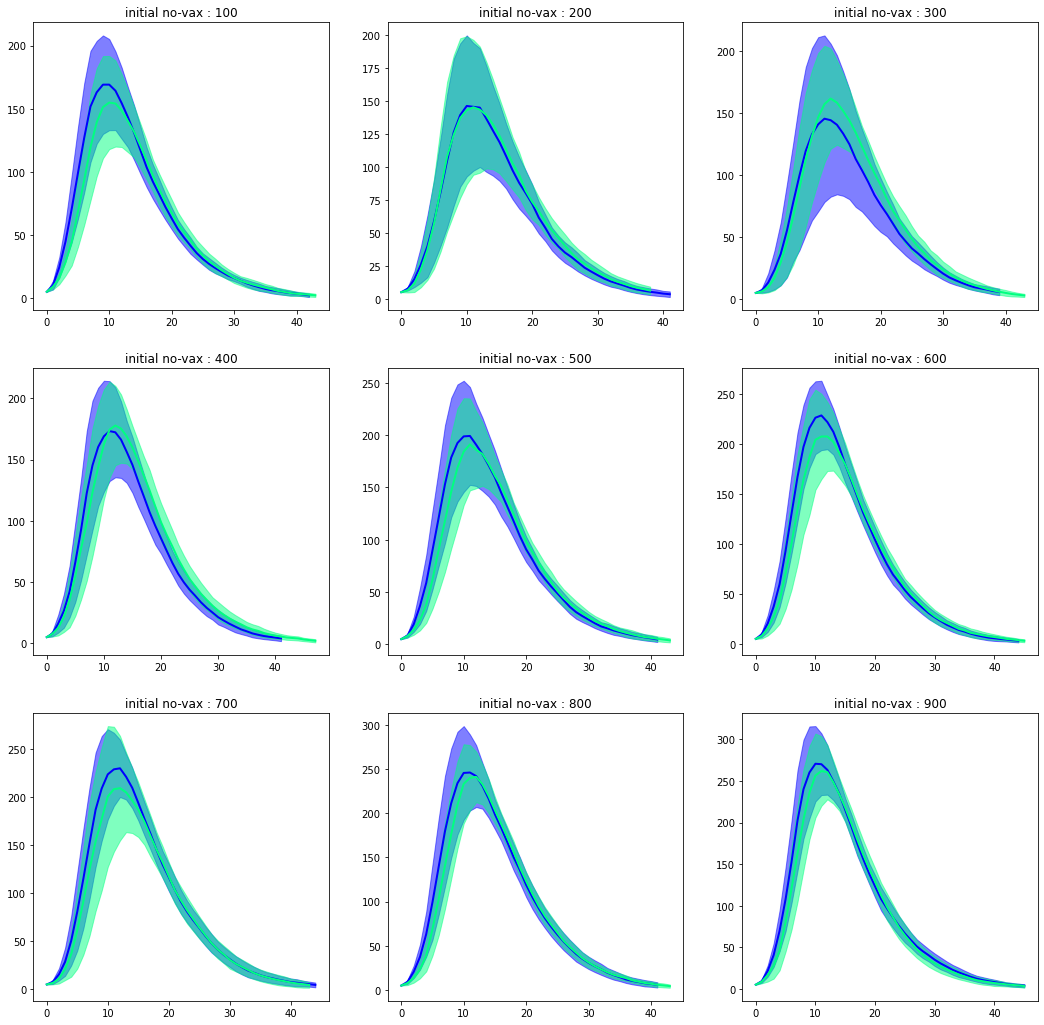

In [4]:
nv_init_grid = np.array([[100, 200, 300], [400, 500, 600], [700, 800, 900]])
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for i in range(3):
    for j in range(3):
        mask1 = static_mean.nv == nv_init_grid[i,j]
        mask2 = static_std.nv == nv_init_grid[i,j]
        mask3 = dynamic_mean.nv == nv_init_grid[i,j]
        mask4 = dynamic_std.nv == nv_init_grid[i,j]
        ax_stat_mean = static_mean[mask1].set_index('time')
        ax_stat_std = static_std[mask2].set_index('time')
        ax_dyn_mean = dynamic_mean[mask3].set_index('time')
        ax_dyn_std = dynamic_std[mask4].set_index('time')

        ax[i,j].set_title(f'initial no-vax : {nv_init_grid[i,j]}')
        ax[i,j].fill_between(ax_stat_mean.index, ax_stat_mean.I - ax_stat_std.I, ax_stat_mean.I + ax_stat_std.I, color=colors(0), alpha=0.5)
        ax[i,j].fill_between(ax_dyn_mean.index, ax_dyn_mean.I - ax_dyn_std.I, ax_dyn_mean.I + ax_dyn_std.I, color=colors(1), alpha=0.5)
        l1, = ax[i,j].plot(ax_stat_mean.index, ax_stat_mean.I, c=colors(0), lw=2)
        l2, = ax[i,j].plot(ax_dyn_mean.index, ax_dyn_mean.I, c=colors(1), lw=2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


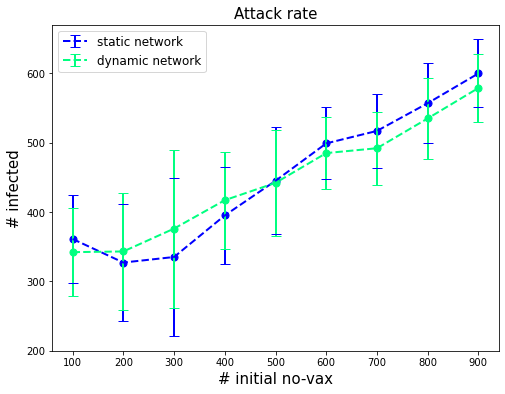

In [6]:
plt.figure(figsize=(8,6))
stat_points = []
stat_std = []
dyn_points = []
dyn_std = []
nv_init_list = [100, 200, 300, 400, 500, 600, 700, 800, 900]
for nv_init in nv_init_list:
    stat_points.append(static_mean[static_mean.nv == nv_init].ar.unique()[0])
    stat_std.append(static_std[static_std.nv == nv_init].ar.unique()[0])
    dyn_points.append(dynamic_mean[dynamic_mean.nv == nv_init].ar.unique()[0])
    dyn_std.append(dynamic_std[dynamic_std.nv == nv_init].ar.unique()[0])

plt.errorbar(nv_init_list, stat_points, stat_std, ls='dashed', lw=2, c=colors(0), capsize=5, label='static network')
plt.scatter(nv_init_list, stat_points, c=colors(0), s=50)

plt.errorbar(nv_init_list, dyn_points, stat_std, ls='dashed', lw=2, c=colors(1), capsize=5, label='dynamic network')
plt.scatter(nv_init_list, dyn_points, c=colors(1), s=50)

plt.title('Attack rate', size=15)
plt.xlabel('# initial no-vax', size=15)
plt.ylabel('# infected', size=15)
plt.legend(fontsize=12)
#plt.grid(alpha=0.5)


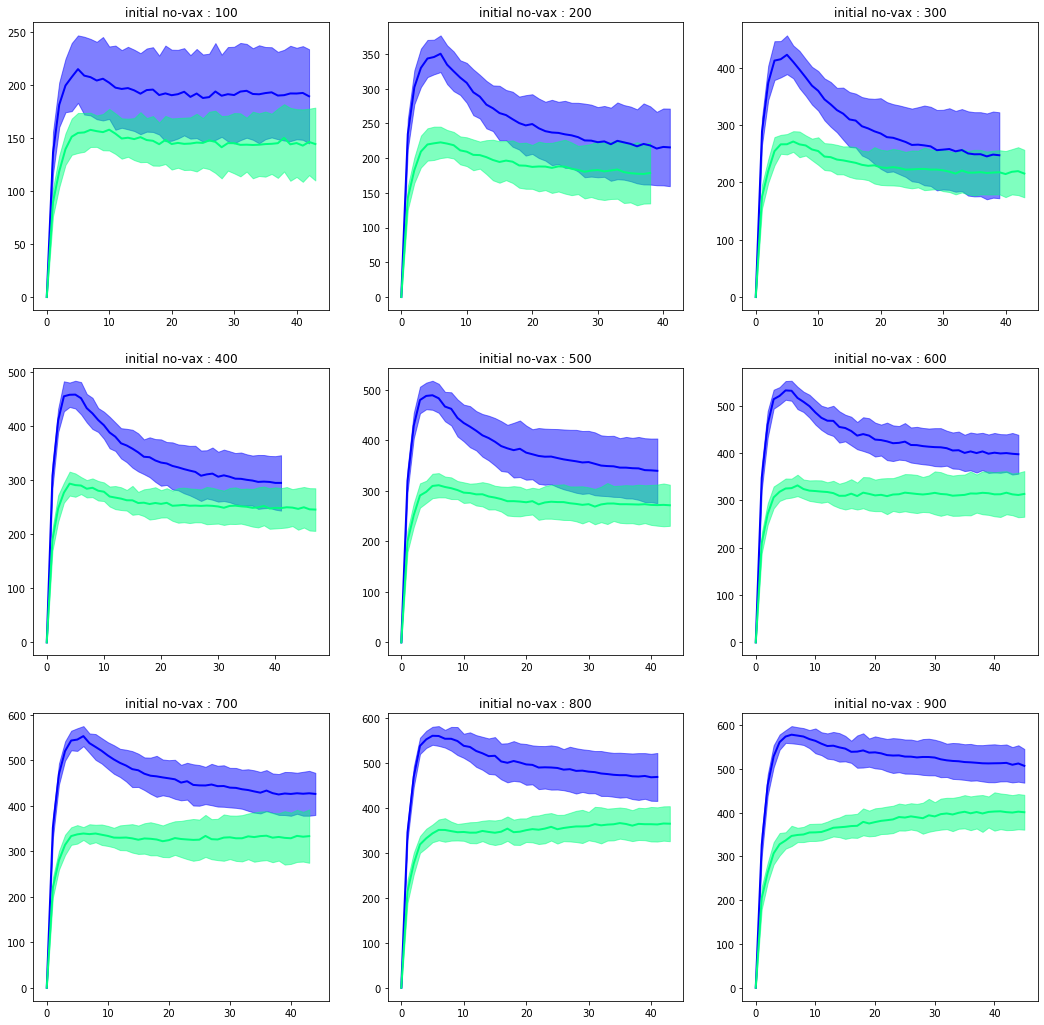

In [8]:
nv_init_grid = np.array([[100, 200, 300], [400, 500, 600], [700, 800, 900]])
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for i in range(3):
    for j in range(3):
        mask1 = static_mean.nv == nv_init_grid[i,j]
        mask2 = static_std.nv == nv_init_grid[i,j]
        mask3 = dynamic_mean.nv == nv_init_grid[i,j]
        mask4 = dynamic_std.nv == nv_init_grid[i,j]
        ax_stat_mean = static_mean[mask1].set_index('time')
        ax_stat_std = static_std[mask2].set_index('time')
        ax_dyn_mean = dynamic_mean[mask3].set_index('time')
        ax_dyn_std = dynamic_std[mask4].set_index('time')

        ax[i,j].set_title(f'initial no-vax : {nv_init_grid[i,j]}')
        ax[i,j].fill_between(ax_stat_mean.index, ax_stat_mean.c2 - ax_stat_std.c2, ax_stat_mean.c2 + ax_stat_std.c2, color=colors(0), alpha=0.5)
        ax[i,j].fill_between(ax_dyn_mean.index, ax_dyn_mean.c2 - ax_dyn_std.c2, ax_dyn_mean.c2 + ax_dyn_std.c2, color=colors(1), alpha=0.5)
        l1, = ax[i,j].plot(ax_stat_mean.index, ax_stat_mean.c2, c=colors(0), lw=2)
        l2, = ax[i,j].plot(ax_dyn_mean.index, ax_dyn_mean.c2, c=colors(1), lw=2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


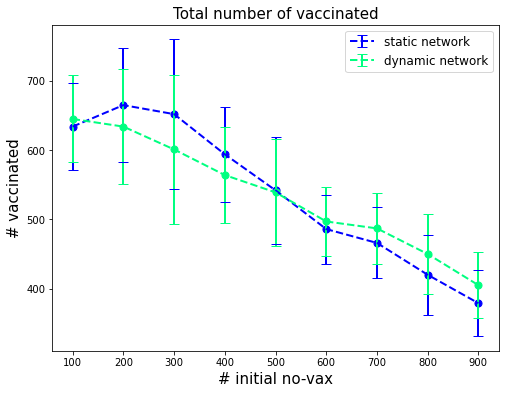

In [10]:
plt.figure(figsize=(8,6))
stat_points = []
stat_std = []
dyn_points = []
dyn_std = []
nv_init_list = [100, 200, 300, 400, 500, 600, 700, 800, 900]
for nv_init in nv_init_list:
    stat_points.append(static_mean[static_mean.nv == nv_init].V_tot.unique()[0])
    stat_std.append(static_std[static_std.nv == nv_init].V_tot.unique()[0])
    dyn_points.append(dynamic_mean[dynamic_mean.nv == nv_init].V_tot.unique()[0])
    dyn_std.append(dynamic_std[dynamic_std.nv == nv_init].V_tot.unique()[0])

plt.errorbar(nv_init_list, stat_points, stat_std, ls='dashed', lw=2, c=colors(0), capsize=5, label='static network')
plt.scatter(nv_init_list, stat_points, c=colors(0), s=50)

plt.errorbar(nv_init_list, dyn_points, stat_std, ls='dashed', lw=2, c=colors(1), capsize=5, label='dynamic network')
plt.scatter(nv_init_list, dyn_points, c=colors(1), s=50)

plt.title('Total number of vaccinated', size=15)
plt.xlabel('# initial no-vax', size=15)
plt.ylabel('# vaccinated', size=15)
plt.legend(fontsize=12)
#plt.grid(alpha=0.5)